# CST8504 Assignment 1: Numpy, Pandas, and Matplotlib

In this assignment, you will use Numpy, Pandas, and Matplotlib to process and visualize real-world time-series data.  When you are finished this assignment, you will know how to:
* Read data from a CSV file into a DataFrame, parsing the date-time column
* Make the date-time column the index of the DataFrame
* Round the seconds.thousandths down to even seconds in the date-time index
* Resample a time-series DataFrame on the minute (taking the average of the values within a minute)
* Similar to the above point, resample a time-series DataFrame to do various aggregations by various time periods, such as mean value by hour, max value by month, or min value by day, etc
* Make plots of temperature data and humidity data

## Instructions
1. You have already unzipped a folder to find this Jupyter notebook there, as well as the unzipped sensor_data folder which contains 6 CSV files of raw data.  Rename this Jupyter notebook to include your Algonquin ID (example: kell0324) in the name instead of "kelleyt".
2. Go through the following cells, reading/running them, and look for comments that instruct you to supply some code to accomplish a result: supply that code in the code cell.
These instructions continue after those cells,
[here](#here)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import pandas as pd

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Create a DataFrame by reading a CSV file of temperature data for a node

In [15]:
node4temp = pd.read_csv('sensor_data/node4temp.csv')

Let's take a look at the resulting DataFrame

In [18]:
node4temp

,2020-10-18 17:46:00.714,14
0,2020-10-18 17:47:00.844,14.000000
1,2020-10-18 17:48:00.897,14.000000
2,2020-10-18 17:49:00.948,14.000000
3,2020-10-18 17:50:00.996,14.000000
4,2020-10-18 17:51:00.047,14.000000
...,...,...
1024432,2022-09-22 11:18:00.545,24.944444
1024433,2022-09-22 11:19:00.768,24.944444
1024434,2022-09-22 11:20:00.984,24.944444
1024435,2022-09-22 11:21:00.231,24.944444


Notice that our CSV file does not include a column header line of column names, so the first row of data has mistakenly been used for the column names.  We can fix that by reparsing the data and supplying the titles.

In [21]:
node4temp = pd.read_csv('sensor_data/node4temp.csv', names=['DateTime','Temperature'])

In [23]:
node4temp

,DateTime,Temperature
0,2020-10-18 17:46:00.714,14.000000
1,2020-10-18 17:47:00.844,14.000000
2,2020-10-18 17:48:00.897,14.000000
3,2020-10-18 17:49:00.948,14.000000
4,2020-10-18 17:50:00.996,14.000000
...,...,...
1024433,2022-09-22 11:18:00.545,24.944444
1024434,2022-09-22 11:19:00.768,24.944444
1024435,2022-09-22 11:20:00.984,24.944444
1024436,2022-09-22 11:21:00.231,24.944444


We have proper column names now.  Let's now check the data types.

In [26]:
node4temp['DateTime'].dtype, node4temp['Temperature'].dtype

(dtype('O'), dtype('float64'))

The float64 for the temperature value looks good, but you can see that the data type of the DateTime colun is dtype('O'), which means it is a Python object.  We really want it to be a date-time, which would be dtype('<M8[ns]') or dtype('datetime64[ns]').  Let's parse the data again, but this time, supply the parse_dates argument, which you can read about by searching for it on this page https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html.  We will use parse_dates=[0], which is a list (one column in this case), meaning it should parse the 0th column as a datetime.

In [29]:
node4temp = pd.read_csv('sensor_data/node4temp.csv', names=['DateTime','Temperature'], parse_dates=[0])

Now when we check the data type of the DateTime column, it is a little-endian version of dtype('datetime64[ns]'), which is dtype('<M8[ns]').  On a big-endian computer, it would be dtype('>M8[ns]').
Another way to do this would have been to use the pd.to_datetime() function
node4temp['DateTime'] = pd.to_datetime(node4temp['DateTime'])

In [34]:
node4temp['DateTime'].dtype

dtype('<M8[ns]')

We can see the parsed DateTime column represents the same dates and times as before, but now more efficiently

In [36]:
node4temp

,DateTime,Temperature
0,2020-10-18 17:46:00.714,14.000000
1,2020-10-18 17:47:00.844,14.000000
2,2020-10-18 17:48:00.897,14.000000
3,2020-10-18 17:49:00.948,14.000000
4,2020-10-18 17:50:00.996,14.000000
...,...,...
1024433,2022-09-22 11:18:00.545,24.944444
1024434,2022-09-22 11:19:00.768,24.944444
1024435,2022-09-22 11:20:00.984,24.944444
1024436,2022-09-22 11:21:00.231,24.944444


We will set the DateTime column as the index.

In [38]:
node4temp.set_index('DateTime', inplace=True)

In [40]:
node4temp

,Temperature
DateTime,
2020-10-18 17:46:00.714,14.000000
2020-10-18 17:47:00.844,14.000000
2020-10-18 17:48:00.897,14.000000
2020-10-18 17:49:00.948,14.000000
2020-10-18 17:50:00.996,14.000000
...,...
2022-09-22 11:18:00.545,24.944444
2022-09-22 11:19:00.768,24.944444
2022-09-22 11:20:00.984,24.944444


We can the type of our index and see it has a datetime64 type:

In [42]:
node4temp.index.inferred_type

'datetime64'

We can use the loc attribute (Deitel 7.14.2) to retrieve the rows for December 25, 2021 as in the cell below.  Note that if the DateTime were a non-index datetime column, we could use boolean indexing: onedayDec252021 = node4temp[(node4temp['DateTime'] > pd.to_datetime('2021-12-25')) & (node4temp['DateTime'] < pd.to_datetime('2021-12-26'))]

In [44]:
node4temp.loc['2021-12-25']

,Temperature
DateTime,
2021-12-25 00:00:00.254,20.833333
2021-12-25 00:01:00.414,20.833333
2021-12-25 00:02:00.575,20.833333
2021-12-25 00:03:00.745,20.833333
2021-12-25 00:04:00.908,20.833333
...,...
2021-12-25 23:55:01.020,21.388889
2021-12-25 23:56:00.181,21.388889
2021-12-25 23:57:00.340,21.388889


We can try to retrieve 2 days with slicing, but this results in an error

In [46]:
twodays = node4temp.loc['2021-12-25':'2021-12-26']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

To address this error, we will sort the index to ensure it is monotonic.  Once the index
is sorted, it is guaranteed to be monotonic (in this case, always increasing).

In [48]:
node4temp.sort_index(inplace=True)

Now that the index is sorted and therefore guaranteed to be monotonic, we can use slices with loc and non-existant values.  '2021-12-25' is a
non-existent value because '2021-12-25 00:00:00.000' is not actually in the data.

In [50]:
node4temp.loc['2021-12-25':'2021-12-26']

,Temperature
DateTime,
2021-12-25 00:00:00.254,20.833333
2021-12-25 00:01:00.414,20.833333
2021-12-25 00:02:00.575,20.833333
2021-12-25 00:03:00.745,20.833333
2021-12-25 00:04:00.908,20.833333
...,...
2021-12-26 23:55:00.540,21.500000
2021-12-26 23:56:00.713,21.500000
2021-12-26 23:57:00.883,21.500000


With the loc attribute, we can retrieve the rows for December, 2021

In [52]:
node4temp.loc['2021-12']

,Temperature
DateTime,
2021-12-01 00:00:00.943,19.611111
2021-12-01 00:01:01.098,19.611111
2021-12-01 00:02:00.257,19.611111
2021-12-01 00:03:00.411,19.611111
2021-12-01 00:04:00.560,19.611111
...,...
2021-12-31 23:55:00.347,13.000000
2021-12-31 23:56:00.510,13.000000
2021-12-31 23:57:00.667,13.000000


We can also use boolean indexing to retrieve rows that satisfy various conditions, like Temperature = 20

In [54]:
node4temp[node4temp['Temperature'] == 20]

,Temperature
DateTime,
2020-12-03 16:53:11.915,20.0
2020-12-03 16:54:00.057,20.0
2020-12-03 16:55:00.118,20.0
2020-12-03 16:56:00.181,20.0
2020-12-03 16:57:00.238,20.0
...,...
2022-06-05 00:54:00.972,20.0
2022-06-05 00:55:01.135,20.0
2022-06-05 00:56:00.300,20.0


Let's plot the data for December 25, 2021


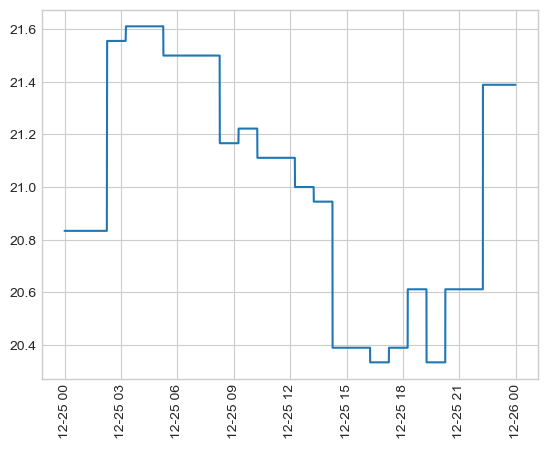

In [56]:
fig = plt.figure()
ax = plt.axes()
ax.plot(node4temp.loc['2021-12-25'])
labels = plt.xticks(rotation='vertical')
#insert code for title 'Node4 Temperature for Dec25'
#insert code for xlabel 'datetime'
#insert code for ylabel 'temperature'

Now, let's truncate the DateTime values by rounding down to the second:

In [58]:
node4temp.index = node4temp.index.floor('s')

Now the nanoseconds are gone from the DateTime.
Notice that the sampling rate seems to be 1 minute, mostly exactly on the minute, but not in the first minutes of December 2021.  Write code in the cell below that will show just the first 15 minutes of December 2021:

In [60]:
# insert code here to show the data for just the first 15 minutes of December 2021 from node4temp
node4temp.loc['2021-12-01 00':'2021-12-01 ']

,Temperature
DateTime,
2021-12-01 00:00:00,19.611111
2021-12-01 00:01:01,19.611111
2021-12-01 00:02:00,19.611111
2021-12-01 00:03:00,19.611111
2021-12-01 00:04:00,19.611111
2021-12-01 00:05:00,19.611111
2021-12-01 00:06:00,19.611111
2021-12-01 00:07:01,19.611111
2021-12-01 00:08:00,19.611111


Notice the temperature doesn't change quickly, and there are a couple of samples taken at the 1 second mark instead of at 0 seconds after the minute. We will now resample the data to make all the samples right on the minute (1min). Scroll down on this page to see the table for the different time periods: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).  We will use the mean of possible multiple values during the minute.  
Notice (YOU WILL NEED THIS KNOWLEDGE TO COMPLETE THE ASSIGNMENT):
* Resampling the index produces a new DataFrame.  In the cell below, we keep just the new one.
* Resampling a datatime index can be done based on other time periods like days, months, years, etc.
* Resampling can use different aggregate functions, like mean, min, max, count, which are applied to the multiple values that fall within the resampling time period.  For example, resampling by month will involve aggregating many values from each month into one value for that month.
The above points will be useful to you when you are asked to plot the monthly max temperature, for example.

In [173]:
node4temp = node4temp.resample('1min').mean()

After the above cell executes, we can see that we've replaced our original DataFrame with the new DataFrame.  If we had used a different variable name on the left side of the assignment, we would have both the new and the old DataFrames.

In [64]:
node4temp.loc['2021-12-01']

,Temperature
DateTime,
2021-12-01 00:00:00,19.611111
2021-12-01 00:01:00,19.611111
2021-12-01 00:02:00,19.611111
2021-12-01 00:03:00,19.611111
2021-12-01 00:04:00,19.611111
...,...
2021-12-01 23:55:00,19.777778
2021-12-01 23:56:00,19.777778
2021-12-01 23:57:00,19.777778


In [66]:
node4temp.describe()

,Temperature
count,996057.000000
mean,19.817380
std,4.346382
min,-17.777778
25%,17.900000
50%,20.500000
75%,22.200000
max,293.888889


This is data from one sensor.  Your task in this assignment is to combine, using the method shown below, all the CSV files into one DataFrame for temperature, and one DataFrame for humidity, and use Matplotlib to plot the data in various ways.  We can repeat the process above for the rest of the CSV files to create a DataFrame for each file, but how do we combine DataFrames?  To illustrate the method, we'll start with two sample DataFrames:

In [68]:
values1 = {'values1' : np.linspace(10,20,9)}
values2 = {'values2' : np.linspace(20,30,10)}
index1 = pd.DatetimeIndex(['2003-11-20 13:07:40',
           '2003-11-20 13:16:13',
           '2003-11-20 13:24:44',
           '2003-11-20 13:33:17',
           '2003-11-20 13:41:49',
           '2003-11-20 13:50:20',
           '2003-11-20 13:58:53',
           '2003-11-20 14:07:24',
           '2003-11-20 14:15:57'],
          dtype='datetime64[ns]')
index2 = pd.DatetimeIndex(['2003-11-20 13:07:40',
           '2003-11-20 13:16:13',
           '2003-11-20 13:24:44',
           '2003-11-20 13:33:17',
           '2003-11-20 13:41:49',
           '2003-11-20 13:50:20',
           '2003-11-20 13:58:53',
           '2003-11-20 14:07:24',
           '2003-11-20 14:15:57',
           '2003-11-20 14:24:28'],
          dtype='datetime64[ns]')

df_one = pd.DataFrame(values1)
df_one.index = index1
df_two = pd.DataFrame(values2)
df_two.index = index2


In [70]:
df_one

,values1
2003-11-20 13:07:40,10.00
2003-11-20 13:16:13,11.25
2003-11-20 13:24:44,12.50
2003-11-20 13:33:17,13.75
2003-11-20 13:41:49,15.00
2003-11-20 13:50:20,16.25
2003-11-20 13:58:53,17.50
2003-11-20 14:07:24,18.75
2003-11-20 14:15:57,20.00


In [72]:
df_two

,values2
2003-11-20 13:07:40,20.000000
2003-11-20 13:16:13,21.111111
2003-11-20 13:24:44,22.222222
2003-11-20 13:33:17,23.333333
2003-11-20 13:41:49,24.444444
2003-11-20 13:50:20,25.555556
2003-11-20 13:58:53,26.666667
2003-11-20 14:07:24,27.777778
2003-11-20 14:15:57,28.888889
2003-11-20 14:24:28,30.000000


Notice that df_two has 10 rows, whereas df_one has only 9 rows.  We will merge these DataFrames into df_three, using an inner join.  The index values that don't match will be dropped, which is OK for our purposes in this assignment. 

In [74]:
df_three = df_one.join(df_two)

In [76]:
df_three

,values1,values2
2003-11-20 13:07:40,10.00,20.000000
2003-11-20 13:16:13,11.25,21.111111
2003-11-20 13:24:44,12.50,22.222222
2003-11-20 13:33:17,13.75,23.333333
2003-11-20 13:41:49,15.00,24.444444
2003-11-20 13:50:20,16.25,25.555556
2003-11-20 13:58:53,17.50,26.666667
2003-11-20 14:07:24,18.75,27.777778
2003-11-20 14:15:57,20.00,28.888889


Now we can write df_three to a CSV file.

In [78]:
df_three.to_csv('df_three.csv')

The following code makes a simple example plot of the data.  More features will be required of your assigned plots, such as labels and a legend.

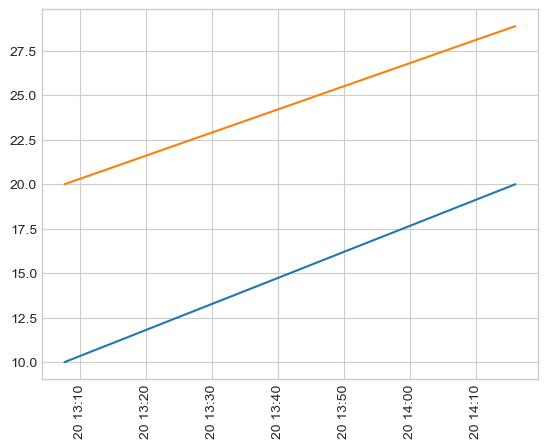

In [80]:
fig = plt.figure()
ax = plt.axes()
ax.plot(df_three)
labels = plt.xticks(rotation='vertical')

Our temperature data includes some values that don't seem right.  These are outliers, and finding outliers using statistical methods is not part of this assignment.  But you do need to be able to print rows, for example, of Temperatures greater than 30 (30C).

In [82]:
#insert code here to print rows in node4temp where the temperature values is greater than 30
node4temp[node4temp['Temperature'] > 30]

,Temperature
DateTime,
2022-02-11 22:26:00,58.300000
2022-02-11 22:27:00,58.300000
2022-02-11 22:28:00,58.300000
2022-02-11 22:29:00,58.300000
2022-02-11 22:30:00,58.300000
...,...
2022-02-25 12:17:00,293.888889
2022-02-25 12:18:00,293.888889
2022-02-25 12:19:00,153.666667


<a id='here'></a>
3. After reading/running the above cells (don't forget to fill in code where asked), you will ready to apply the same types of operations to complete the main assignment work, which is to 
 * Observe the CSV files are data for temperature and relative humidity for 3 sensors, node4, node5, node6, which comprise 6 files.  Make up your own simple room names (be creative), like Kitchen, Nook, Closet, and we'll pretend the three nodes are in these rooms of your house.
 * Based on the techniques illustrated in the above Jupyter cells, add more cells to this notebook as necessary to create two dataframes from the data, using variables temperature and humidity to hold them, with hourly mean values.  Supply a markdown cell above each code cell to explain in your own words what the code cell is doing.  Each of your two dataframes will have three columns of data (plus the datetime index), labeled with your three room names.
 * Create cells that will write out CSV files for the two main dataframes, as well as CSV files for dataframes representing the monthly maximum values, and monthly minimum values (this adds up to 6 CSV files in total)
 * Create markdown and code cells to plot the temperatures for August 2021 in the three rooms on one plot, and do the same for humidity
 * The plots in the above point should have a title, x-label, y-label, and a legend (revisit https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)
 * Submit just your completed version of this Jupyter notebook.
 * Demonstrate your work to your lab instructor, being prepared to explain your work if asked.

Read the CSV files into 6 dataframes

In [85]:
import pandas as pd

node4t = pd.read_csv('sensor_data/node4temp.csv', names=['DateTime','Temperature'], parse_dates=[0])
node5t = pd.read_csv('sensor_data/node5temp.csv', names=['DateTime','Temperature'], parse_dates=[0])
node6t = pd.read_csv('sensor_data/node6temp.csv', names=['DateTime','Temperature'], parse_dates=[0])

node4h = pd.read_csv('sensor_data/node4humidity.csv', names=['DateTime','Humidity'], parse_dates=[0])
node5h = pd.read_csv('sensor_data/node5humidity.csv', names=['DateTime','Humidity'], parse_dates=[0])
node6h = pd.read_csv('sensor_data/node6humidity.csv', names=['DateTime','Humidity'], parse_dates=[0])

Set DateTime as the index

In [87]:
node4t.set_index('DateTime', inplace=True)
node5t.set_index('DateTime', inplace=True)
node6t.set_index('DateTime', inplace=True)

node4h.set_index('DateTime', inplace=True)
node5h.set_index('DateTime', inplace=True)
node6h.set_index('DateTime', inplace=True)

Make new dataframe containing only mean hourly values

In [89]:
node4_meantemp = node4t['Temperature'].resample('h').mean()
node5_meantemp = node5t['Temperature'].resample('h').mean()
node6_meantemp = node6t['Temperature'].resample('h').mean()

node4_meanhumid = node4h['Humidity'].resample('h').mean()
node5_meanhumid = node5h['Humidity'].resample('h').mean()
node6_meanhumid = node6h['Humidity'].resample('h').mean()

Join the dataframes together

In [91]:
alltemp = pd.concat([node4_meantemp,node5_meantemp,node6_meantemp], axis = 1)
allhumid = pd.concat([node4_meanhumid,node5_meanhumid,node6_meanhumid], axis = 1)

alltemp.columns = ['bedroom', 'kitchen','bathroom']
allhumid.columns = ['bedroom', 'kitchen','bathroom']

Print to CSV

In [93]:
alltemp.to_csv('hourly_temperature.csv')
allhumid.to_csv('hourly_humidity')

Make dataframes containing max and min values of the month.

In [95]:
max_month_temp = alltemp.resample('ME').max()
max_month_humid = allhumid.resample('ME').max()

min_month_temp = alltemp.resample('ME').min()
min_month_humid = allhumid.resample('ME').min()

Print to CSV

In [97]:
max_month_temp.to_csv('monthly_max_temperature.csv')
max_month_humid.to_csv('monthly_max_humid.csv')

min_month_temp.to_csv('monthly_min_temperature.csv')
min_month_humid.to_csv('monthly_min_humid.csv')

Take the August 2021 data to create new dataframes

In [99]:
august_temp = alltemp.loc['2021-08']
august_humid = allhumid.loc['2021-08']

Create plot for August 2021 temperature

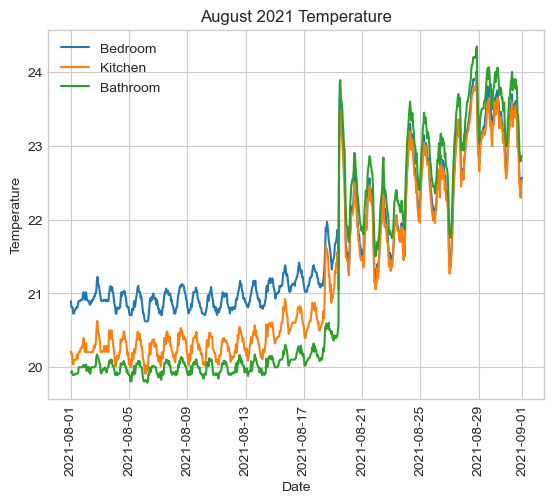

In [109]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

ax.plot(august_temp.index, august_temp['bedroom'], label='Bedroom')
ax.plot(august_temp.index, august_temp['kitchen'], label='Kitchen')
ax.plot(august_temp.index, august_temp['bathroom'], label='Bathroom')

labels = plt.xticks(rotation = 'vertical')
ax.set_title('August 2021 Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.legend()

Create plot for 2021 humidity

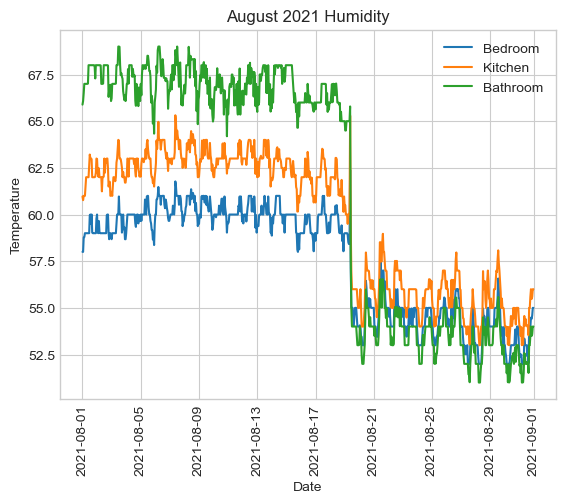

In [113]:
fig = plt.figure()
ax = plt.axes()

ax.plot(august_humid.index, august_humid['bedroom'], label='Bedroom')
ax.plot(august_humid.index, august_humid['kitchen'], label='Kitchen')
ax.plot(august_humid.index, august_humid['bathroom'], label='Bathroom')

labels = plt.xticks(rotation = 'vertical')
ax.set_title('August 2021 Humidity')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.legend()